In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# load the dataset from a CSV into a pandas DataFrame
df = pd.read_csv('hsbdemo.csv')

# remove unnecessary first column
df = df.iloc[:, 1:]

# factorize categorical variables
categorical_columns = ['female', 'ses', 'schtyp', 'honors', 'prog']
for col in categorical_columns:
    df[col], _ = pd.factorize(df[col])

# define the initial feature variables
X = df.drop(columns=['prog'])

# define the target variable
y = df['prog']

In [3]:
# split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# initialize SelectKBest to select the top 4 features based on 'f_classif' test
selection = SelectKBest(f_classif, k=4)
X_train = selection.fit_transform(X_train, y_train)
X_test = selection.transform(X_test)

# print the shape of feature matrix
print(X_train.shape, X_test.shape)

# normalize the features for kNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(140, 4) (60, 4)


k = 1   accuracy = 0.5166666666666667
k = 3   accuracy = 0.5833333333333334
k = 5   accuracy = 0.5333333333333333
k = 7   accuracy = 0.5166666666666667
k = 9   accuracy = 0.5833333333333334
k = 11   accuracy = 0.6
k = 13   accuracy = 0.6
k = 15   accuracy = 0.6166666666666667
k = 17   accuracy = 0.6333333333333333
k = 19   accuracy = 0.6166666666666667
k = 21   accuracy = 0.6166666666666667
k = 23   accuracy = 0.6
k = 25   accuracy = 0.6333333333333333
k = 27   accuracy = 0.6833333333333333
k = 29   accuracy = 0.6666666666666666
k = 31   accuracy = 0.7
k = 33   accuracy = 0.7
k = 35   accuracy = 0.6833333333333333
k = 37   accuracy = 0.6833333333333333
k = 39   accuracy = 0.7
k = 41   accuracy = 0.7
k = 43   accuracy = 0.6833333333333333
k = 45   accuracy = 0.6833333333333333
k = 47   accuracy = 0.7
k = 49   accuracy = 0.7


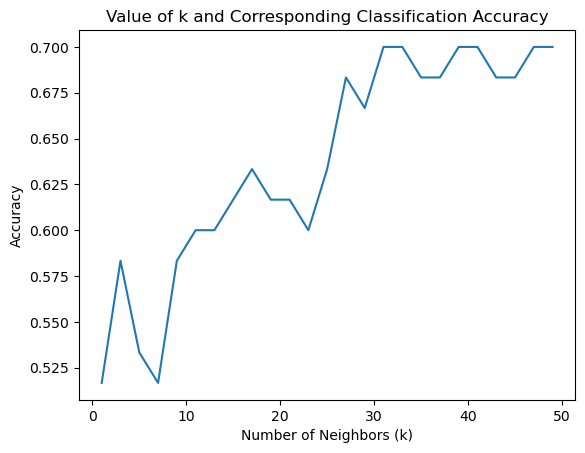

In [4]:
res = [] # initilaze empty list to store accuracy results for different k values

# loop over odd k values 1 to 51 (smaller dataset) to find best k value for classifier
for k in range(1, 51, 2):
    classifier = KNeighborsClassifier(n_neighbors=k) # KNN classifier instance with k neighbors
    classifier.fit(X_train, y_train)  # train the classifier
    prediction = classifier.predict(X_test) # make prediction on test set
    accuracy = np.where(prediction==y_test, 1, 0).sum() / len(y_test) # calculate accuracy
    print(f'k = {k}   accuracy = {accuracy}')
    res.append([k, accuracy]) # store k and accuracy result

# convert res list to a DataFrame for plotting
res = pd.DataFrame(res, columns=['k', 'accuracy'])

# plot accuracy values against different k values
plt.plot(res.k, res.accuracy)
plt.title("Value of k and Corresponding Classification Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.show()

In [5]:
# get the selected feature names
print('Selecte features:', X.columns[selection.get_support()].tolist())

Selecte features: ['write', 'math', 'socst', 'cid']
